# Final LDA Model

In [1]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

from datetime import datetime

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
# import pyLDAvis.gensim  # Author: don't skip this
# pyLDAvis.gensim.prepare

# I think i need another one:
import pyLDAvis.gensim_models
import pyLDAvis.gensim_models as gensimvis

# Plots
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

# TF.IDF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics.pairwise import cosine_distances

In [2]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('dutch')
stop_words.extend(['tenlastelegging', 'hof', 'althans', 'tenlastegelegd', 'naan', 'verklaring', 'verklaren', 'benadelen', 'naam', 'aangeefster', 'aangever', 'aangev', 'verbalisant', 'slachtoffer', 'rechtbank', 'uur', 'uren', 'weten', 'bestaan', 'waarheid', 'daarvoor', 'genaamd', 'maken', 'gaan', 'toverweging', 'aanzien', 'bewijs', 'feit', 'grond', 'staan', 'vaststellen', 'halen', 'vervolgens', 'nemen', 'aanhouden', 'bevinden', 'officier', 'justitie', 'overtuigen', 'bewijzen', 'maken', 'stellen', 'leggen', 'dienen', 'vrijspreken', 'daarnaast', 'bezigen', 'willen', 'gaan', 'vervolgens', 'raken', 'weten', 'proberen', 'echter', 'vraag', 'verdenken', 'vervatten', 'beslissing', 'hoger_beroep', 'verkort_vonni', 'geacht', 'instellen', 'ander', 'zien', 'toebehoren', 'hoeveelheid', 'lijst_ii', 'bereiken'])

# Test 

In [3]:

df18 = pd.read_csv('/Users/dj/Python - UvA/DSP/data_2018.csv', index_col=0) 
df19 = pd.read_csv('/Users/dj/Python - UvA/DSP/data_2019.csv', index_col=0) 
df20 = pd.read_csv('/Users/dj/Python - UvA/DSP/data_2020.csv', index_col=0) 
df21 = pd.read_csv('/Users/dj/Python - UvA/DSP/data_2021.csv', index_col=0) 

print(df18.shape)
print(df19.shape)
print(df20.shape)
print(df21.shape)

tfidf18 = pd.read_csv('/Users/dj/Python - UvA/DSP/topidfs_2018.csv', index_col=0) 
tfidf19 = pd.read_csv('/Users/dj/Python - UvA/DSP/topidfs_2019.csv', index_col=0) 
tfidf20 = pd.read_csv('/Users/dj/Python - UvA/DSP/topidfs_2020.csv', index_col=0) 
tfidf21 = pd.read_csv('/Users/dj/Python - UvA/DSP/topidfs_2021.csv', index_col=0) 

i2w_df = pd.read_csv('/Users/dj/Python - UvA/DSP/i2words_df.csv', index_col=0) 


(300, 11)
(306, 11)
(315, 11)
(527, 11)


In [9]:
type(i2w_df.iloc[0,:])

pandas.core.series.Series

# Build Giant Function

In [13]:

def get_lda_model(df):

    def sent_to_words(sentences):
        for sentence in sentences:
            yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

    data_words = list(sent_to_words(df['lemm']))


    nlp = spacy.load("nl_core_news_sm")

    # Initialize spacy 'en' model, keeping only tagger component (for efficiency)
    # python3 -m spacy download en
    # nlp = spacy.load('nl', disable=['parser', 'ner'])


    # Create Dictionary
    id2word = i2w_df.iloc[0,:].dropna()

    # Create Corpus
    texts = data_words

    # Term Document Frequency
    corpus = df18['corpus']
    # corpus1 = [str(item) for item in corpus]

    # Build LDA model
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=5, 
                                            random_state=100,
                                            update_every=1,
                                            chunksize=100,
                                            passes=10,
                                            alpha='auto',
                                            per_word_topics=True)

     

    return(lda_model)

In [14]:
test = get_lda_model(df18)

TypeError: unsupported operand type(s) for +: 'int' and 'str'

# Compute Model Perplexity and Coherence Score

In [ ]:
# 18 = 0 / 19 = 1 / 20 = 2 / 21 = 3

a = 3

# Compute Perplexity
print('\nPerplexity: ', lda_models[a].log_perplexity(corps[a]))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_models[a], texts=dat_lems[a], dictionary=ids[a], coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

# Visualize the topics-keywords

In [ ]:
# 18 = 0 / 19 = 1 / 20 = 2 / 21 = 3

a = 0

# Visualize the topics
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_models[a], corps[a], ids[a], R = 10)
vis

# TF.IDF 

In [4]:
values = []
years = ('2018', '2019', '2020', '2021')
term = 'fiets'

def avg_terms(data, term):
    avg = data[data['term'].str.contains(term)]['tfidf'].mean()
    return(avg)

    
for i in top_idfs:
    if term in list(i['term']):
        a  = avg_terms(i, term)
        values.append(a)
    else:
        values.append(0)

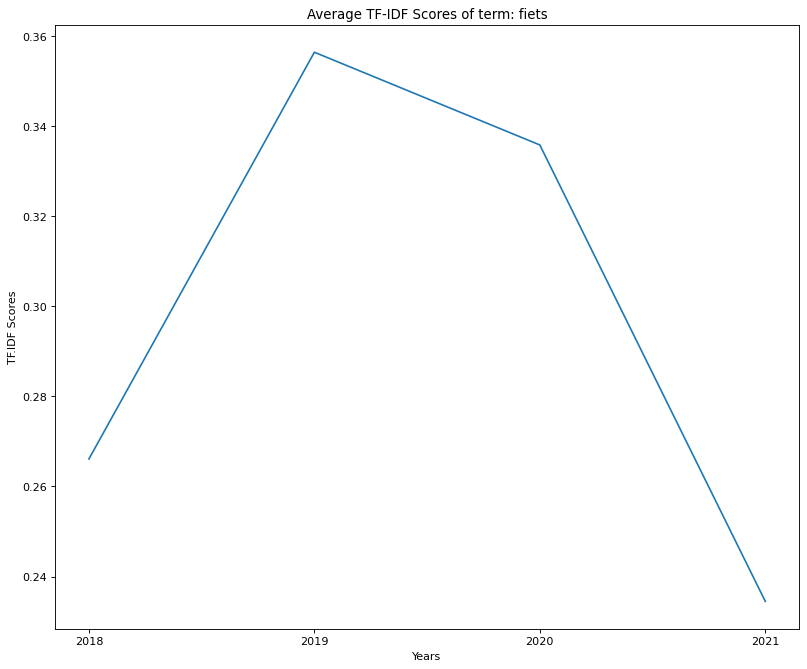

In [5]:
x_pos = [0,1,2,3]

figure(figsize=(12, 10), dpi=80)

plt.plot(values)


# Add title and axis names
plt.title('Average TF-IDF Scores of term: {}'.format(term))
plt.xlabel('Years')
plt.ylabel('TF.IDF Scores')
 
# Create names on the x axis
plt.xticks(x_pos, years)
 
# Show graph
plt.show()

In [ ]:
values

In [6]:
import altair as alt
import numpy as np

# 18 = 0 / 19 = 1 / 20 = 2 / 21 = 3

a = 0

# Terms in this list will get a red dot in the visualization
term_list = ['kledingwinkel', 'albert_heijn'] # Highlight the words of interest

# adding a little randomness to break ties in term ranking
top_tfidf_plusRand = top_idfs[a].copy()
top_tfidf_plusRand = top_tfidf_plusRand.iloc[:500,]
top_tfidf_plusRand['tfidf'] = top_tfidf_plusRand['tfidf'] + np.random.rand(top_tfidf_plusRand.shape[0])*0.0001

# base for all visualizations, with rank calculation
base = alt.Chart(top_tfidf_plusRand).encode(
    x = 'rank:O',
    y = 'document:N'
).transform_window(
    rank = "rank()",
    sort = [alt.SortField("tfidf", order="descending")],
    groupby = ["document"],
)

# heatmap specification
heatmap = base.mark_rect().encode(
    color = 'tfidf:Q'
)

# red circle over terms in above list
circle = base.mark_circle(size=100).encode(
    color = alt.condition(
        alt.FieldOneOfPredicate(field='term', oneOf=term_list),
        alt.value('red'),
        alt.value('#FFFFFF00')        
    )
)

# text labels, white for darker heatmap colors
text = base.mark_text(baseline='middle').encode(
    text = 'term:N',
    color = alt.condition(alt.datum.tfidf >= 0.23, alt.value('white'), alt.value('black'))
)

# display the three superimposed visualizations
(heatmap + circle + text).properties(width = 1200)

alt.LayerChart(...)

# Scattertext

In [18]:
import scattertext as st
import re, io
from pprint import pprint
import pandas as pd
import numpy as np
from scipy.stats import rankdata, hmean, norm
import spacy
import os, pkgutil, json, urllib
from urllib.request import urlopen
from IPython.display import IFrame
from IPython.core.display import display, HTML
from scattertext import CorpusFromPandas, produce_scattertext_explorer
display(HTML("<style>.container { width:98% !important; }</style>"))

In [19]:
import scattertext as st
import re, io
from pprint import pprint
import pandas as pd
import numpy as np
from scipy.stats import rankdata, hmean, norm
import spacy
import os, pkgutil, json, urllib
from urllib.request import urlopen
from IPython.display import IFrame
from IPython.core.display import display, HTML
from scattertext import CorpusFromPandas, produce_scattertext_explorer
import selenium
from selenium import webdriver
import webbrowser
import codecs
display(HTML("<style>.container { width:98% !important; }</style>"))

In [20]:

df18['year'] = df18['year'].astype("string")
df19['year'] = df19['year'].astype("string")
df20['year'] = df20['year'].astype("string")
df21['year'] = df21['year'].astype("string")

frames = [df18, df19]

result = pd.concat(frames)

nlp = spacy.load("nl_core_news_sm")

In [44]:
result['lemm'] = str(result['lemm'])

In [49]:
result['lemm'][0]

'date\n2018-01-08    laste_gelegd periode oostenrijk opzettelijk mi...\n2018-01-24    bewijsverweren terechtzitting raadsman standpu...\n2018-01-26    bewijsmiddel volgen bewonen vrouw zoon vrijsta...\n2018-01-26    primair plaats gemeente gemeente uitvoering op...\n2018-01-03    zover oordeel onderwerpen laste_gelegd zaak pa...\n                                    ...                        \n2019-01-18    laste_gelegd bleiswijk dollar oekraiens rijbew...\n2019-01-28    standpunt rekwireren primair primair laste_gel...\n2019-01-23    poging doodslag vleesmes totaal lengte centime...\n2019-01-25    bewijsmiddel thuiskomen woning straatnaam woon...\n2019-01-02    bijlage parketnummer toewijzen vordering nader...\nName: lemm, Length: 606, dtype: object'

In [45]:
result['parsed'] = result.lemm.apply(nlp)

In [46]:
result = result.rename(columns={"Unnamed: 0": "Doc_Number"})
result["Doc_Number"] = result["Doc_Number"].astype("category")
result["year"] = result["year"].astype("category")

In [47]:
corpus_scat_text = st.CorpusFromParsedDocuments(result, category_col='year', parsed_col='parsed').build()

In [31]:
html = produce_scattertext_explorer(corpus_scat_text,
                                    category='2018',
                                    category_name='2018',
                                    not_category_name='2019',
                                    width_in_pixels=1000,
                                    minimum_term_frequency=5,
                                    metadata=corpus_scat_text.get_df()['filename'],
                                    transform= st.Scalers.log_scale_standardize) 


In [32]:
import codecs
import webbrowser
import IPython

file_name = 'result_scatter_scale.html'
open(file_name, 'wb').write(html.encode('utf-8'))
IFrame(src=file_name, width = 1200, height=700)

In [ ]:
# d = [df18, df19, df20, df21] # Savable - done
#q = 1
#lda_models = [] # gensim.models.ldamodel.LdaModel - done
#dat_lems = [] # its a list - try - this should be in the dat column lemm - done
#corps = [] # its a list - try - done
#ids = [] # gensim - seperate df - done
#top_idfs = [] # savable - done

In [20]:
type(df18['year'][0])

numpy.int64